Danny Abraham & Jad Abi Zaki
<center><h1>CMPS 351</h1></center>
<center><h2>Assignment 10</h2></center>

In [143]:
import numpy as np
import numpy.linalg as la
from bunch import Bunch
import scipy.optimize
import matplotlib.pyplot as plt
from scipy.optimize import linprog as lp

## Central Path 
---

#### The convex problem: 
$$ \underset{ x}min \qquad\qquad f_0(x) $$
$$ \textit{subject to}\qquad Ax = b$$
$$\qquad\qquad\qquad f_i(x)\le 0$$




#### Log Barrier Problem

$$ \;\underset{x}min\qquad f_0(x) - \tau\sum_{i=1}^{m} log(-f_i(x))$$
$$ \textit{subject to}\qquad Ax = b\qquad\qquad$$

#### KKT Conditions:

$$ \nabla f_0(x) - A^t\nu - Df(x)^t\lambda= 0  $$

$$ Ax - b = 0 $$

$$  -\lambda f(x) - \tau\textbf{1} = 0$$

$$ -f(x) \ge 0 $$

$$ \lambda \ge 0 $$

The general form of the KKT conditions of a point on the central path can be expressed as 

$$ \nabla f_0(x) - A^t\nu - \sum_{i=1}^{m}\lambda_i\nabla f_i(x) = 0  $$

$$ Ax - b = 0 $$

$$  -\lambda_i f_i(x) - \tau = 0 $$

$$ -f_i(x) \ge 0 $$

$$ \lambda \ge 0 $$

We see here that they are identical to the KKT conditions written above

## Interior Point Method for LP
---

In [144]:
A = np.ones([100, 150])
print(A.shape)

b = np.ones([100, 1])
print(b.shape)

nu = np.ones([100, 1])
print(nu.shape)

lam = np.zeros([150, 1]) + 0.5
print(lam.shape)

p = np.ones([150, 1])
print(p.shape)

tau = 1

x = np.ones([150, 1])

(100, 150)
(100, 1)
(100, 1)
(150, 1)
(150, 1)


In [145]:
np.random.seed(9727)            # seed the random number generator
n = 150 
p = 100

# Generate random data
A = np.hstack( (np.random.randn(p, n-p), np.eye(p)) ) 
b = A @ np.random.rand(n)
pobj = np.concatenate( (np.random.randn(n-p), np.zeros(p)) ) 



# Solution may be compared to the one generated by linprog
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html
solution = scipy.optimize.linprog(pobj, method='interior-point', A_eq = A, b_eq = b)
print(solution)

     con: array([-3.48965301e-12, -1.10311760e-11,  1.28297373e-12,  2.14557261e-11,
        2.78532752e-11, -4.83801887e-12,  8.16458012e-12, -2.17603713e-11,
       -1.15454313e-11, -2.25746088e-11, -3.43982620e-11,  1.91597849e-11,
       -2.72137868e-11,  3.59445806e-12,  1.05748743e-11, -7.90656429e-12,
       -7.04112324e-11, -2.84021695e-11, -1.53148605e-11,  1.05426778e-11,
        1.67865721e-13, -1.57056590e-11, -2.04636308e-11, -9.17088627e-12,
       -2.31876740e-11, -1.46211931e-11,  2.60222954e-11, -3.05782066e-11,
        2.69695377e-12,  1.13766774e-11, -1.47419854e-11, -2.73399081e-11,
       -2.14628315e-11,  2.00524042e-11,  3.15512061e-11, -5.92736971e-12,
        2.03164152e-11,  4.91902075e-11,  1.45181644e-11,  8.34110558e-12,
        1.40891743e-11,  1.32092115e-11, -7.83906273e-12,  4.38160619e-12,
        1.10857989e-11, -4.21795932e-11, -2.13007390e-11, -3.69211328e-11,
       -5.48339152e-12, -5.77760062e-13, -1.84536830e-11, -3.96589428e-11,
        3.49564

In [146]:
#b = b.reshape([100, 1])

#### Feasible Starting Point

The equality-constrained problem in the last assignment was

$$ - \sum_{i=1}^{n} logx_i$$
$$ \textit{subject to}\qquad Ax = b\qquad\qquad$$

Given a solution to this problem, it will satisfy the equality constraints $Ax = b$. It will also satisfy the inequality constraints $x \ge 0$ because otherwise $logx_i$ is undefined.

This means a solution to this problem will satisfy the constraints of the new problem, making it a feasible starting point

#### The Equality-Constrained Problem Solved at Every Step

The equality constrained problem we are solving at every step is


$$ \;\underset{x}min\qquad p^tx - \tau\sum_{i=1}^{m} log(-x)$$
$$ \textit{subject to}\qquad Ax = b\qquad\qquad$$

Its KKT conditions can be expressed as

$$ p - A^t\nu - \lambda = 0  $$

$$ Ax - b = 0 $$

$$  X\Lambda \textbf{1} - \tau\textbf{1} = 0$$

$$ -x \ge 0 $$

$$ \lambda \ge 0 $$

The general form of the KKT conditions of a point on the central path can be expressed as 

$$ \nabla f_0(x) - A^t\nu - \sum_{i=1}^{m}\lambda_i\nabla f_i(x) = 0  $$

$$ Ax - b = 0 $$

$$  -\lambda_i f_i(x) - \tau = 0 $$

$$ f_i(x) \ge 0 $$

$$ \lambda \ge 0 $$

However, $f_i(x) = -x$ and $\nabla f_i(x) = -1$ this transforms the KKT conditions to be the exact same as the equality-constrained problem above

#### Finding a  Feasible Starting Point

In [147]:
def func(x):
    return - np.sum(np.log(x))

In [148]:
def res(x, nu):
    r1 = -(1/x) + A.T@nu
    r2 = A@x - b
    r = np.hstack([r1, r2])
    r = r.T
    return r

In [149]:
def jacobian(x):
    h = (1/(x**2))
    h = np.diag(h)
    j1 = np.hstack([h, A.T])
    j2 = np.hstack([A, np.zeros([p, p])])
    j = np.vstack([j1, j2])
    return j

In [150]:
def btLineSearch(x, nu, t, p, alpha = 0.01, beta = 0.8):
    while (x + t*p[:n]<0).any():
        t=t*beta
    while (la.norm(res(x + t*p[:n], nu + t*p[n:])) >= (1 - alpha*t)*la.norm(res(x,nu))):
        t *= beta
    return t

In [151]:
def infeasible_newton(x0, nu0, tol = 2e-6):
    x = x0
    nu= nu0
    histx  = np.array([x0])
    histnu = np.array([nu0])
    while(la.norm(res(x, nu)) > tol):
        print(la.norm(res(x,nu)), end='\r')
        p = la.solve(jacobian(x), - res(x, nu))
        t = btLineSearch(x,nu,1,p)
        x = x + t*p[:n]
        nu = nu + t*p[n:]
        histx = np.vstack([histx , x])
        histnu = np.vstack([histnu , nu])
    return histx, histnu , x, nu 

In [152]:
x = np.ones(n)
nu = np.zeros(p)
histx, histnu, xstar, nustar = infeasible_newton(x, nu)

In [153]:
(xstar>=0).all()

True

In [154]:
(abs(A@xstar-b)<0.00000000000001).all()

True

#### Residual

In [155]:
xstar = xstar.reshape([150, 1])
nustar = nustar.reshape([100, 1])
b = b.reshape([100, 1])

In [156]:
def residual(x, nu, lam, tau):
    r1 = pobj.reshape([150, 1]) + A.T@nu - lam #p + A.T@nu + (-np.ones(150)).T@lam
    r2 = A@x - b
    r3 = np.diag(lam[:, 0])@x - tau*np.ones([150, 1])
    r = np.vstack([r1, r2, r3])
    return r

#### Jacobian

In [157]:
def jacobian(x, nu, lam):
    j11 = np.zeros([150, 150])
    j12 = A.T
    j13 = -np.identity(150)
    j1 = np.hstack([j11, j12, j13])
    
    j21 = A
    j22 = np.zeros([100, 100])
    j23 = np.zeros([100, 150])
    j2  = np.hstack([j21, j22, j23])
    
    j31 = np.diag(lam[:, 0])
    j32 = np.zeros([150, 100])
    j33 = np.diag(x[:, 0])
    j3  = np.hstack([j31, j32, j33])
    
    j   = np.vstack([j1, j2, j3])
    return j

In [158]:
jacobian(xstar, nustar, lam).shape

(400, 400)

#### Path Following Method

In [159]:
def backtrack(x, nu, lam, t, p,tau, alpha=0.01, beta=0.8):
    delta_x = p[:150].reshape([150, 1])
    delta_nu = p[150:250].reshape([100, 1])
    delta_lam = p[250:].reshape([150, 1])
        
    while (-(x + t*delta_x)).any() <0:
        #print("Stuck Second")
        t *= beta    
    while la.norm(residual(x + t*delta_x, nu + t*delta_nu, lam + t*delta_lam,tau)) >= (1 - alpha*t)*la.norm(residual(x, nu, lam, tau)):
        #print("Stuck First")
        t *= beta

    return t

In [160]:
def interior_LP(x0, nu0, lam0, tau, mu = 2, tol1 = 1e-6, tol2=1e-6):
    
    iterations = 0
    x_star = None
    nu_star = None
    lam_star = None
    dual_gap = None
    
    x = x0
    nu = nu0
    lam = lam0
    
    history = [la.norm(residual(x, nu, lam, tau))]
    
    while 150 * tau >= tol1:
        while la.norm(residual(x, nu, lam, tau)) >= tol2:
            
            #print(la.norm(residual(x, nu, lam, tau)))
            
            p = la.solve(jacobian(x, nu, lam), - residual(x, nu, lam, tau))

            delta_x = p[:150].reshape([150, 1])
            delta_nu = p[150:250].reshape([100, 1])
            delta_lam = p[250:].reshape([150, 1])
            
            s_max = np.amin(np.abs(np.divide(lam , delta_lam)))
            t = min(1, 0.99*s_max)
            
            t = backtrack(x, nu, lam, t, p,tau)
            
            x = x + t*delta_x
            nu = nu + t*delta_nu
            lam = lam + t* delta_lam
            
            iterations += 1
            history.append(la.norm(residual(x, nu, lam, tau)))
            
        x_star = x
        nu_star = nu
        lam_star = lam
            
        tau = tau / mu
    
    solution = Bunch()
    solution.x_star = x_star
    solution.nu_star = nu_star
    solution.lam_star = lam_star
    solution.dual_gap = 150 * tau
    solution.iterations = iterations
    solution.history = history
    
    return solution

In [161]:
my_solution = interior_LP(xstar, nustar, lam, tau)

In [162]:
(pobj@my_solution.x_star)[0]

-3.718630460431812

In [163]:
solution.fun

-3.7186319504597276

### $\mu = 2$

In [164]:
my_solution = interior_LP(xstar, nustar, lam, tau)

In [165]:
my_solution.iterations

74

### $\mu = 10$

In [166]:
my_solution = interior_LP(xstar, nustar, lam, tau, 10)

In [167]:
my_solution.iterations

46

With $\mu = 10$ we converged in fewer total iterations of the inner loop. This is expected as $\tau$ converges to $0$ at a faster rate with a larger $\mu$, thus we will be solving fewer and fewer equality-constrained problems in the process. 

This means that it is not necessary to take small steps in values of $\tau$ at least in this case, since we end up spending a lot of iterations in the non-quadratic stage of Newton's method's convergence.

## Interior-Point Barrier Method
---

In [168]:
p = 100
n = 200
c = np.zeros(201)
c[-1] = 1
A = -np.random.normal(size = [p,n])
b = np.ones(100)
A_ub = np.c_[A,-np.ones(100)]
bounds = []

res = lp(c, A_ub = A_ub, b_ub = b ,bounds = (None,None),options={"disp": True})

Optimization failed. The problem appears to be unbounded.
         Iterations: 86


In [169]:
x0 = res.x[:-1]

In [170]:
H = np.identity(200)
p = np.zeros(200)

def f(x, u):
    sum1 = np.dot(np.dot(x.T,H),x)/2 + p@x
    sum2 = -np.sum(np.log(-np.dot(A,x)+b))
    return sum1+u*sum2

def g(x, u):
    gf = np.dot(H.T,x)+p
    f = np.dot(A,x)-b
    go = np.zeros(200)
    for index,i in enumerate(f):
        if i!= 0:
            go += -A[index][:]/i
    return gf + u*go

def h(x,u):
    hf = H
    f = np.dot(A,x)-b
    ho = 0
    for index,i in enumerate(f):
        if i!= 0:
            ho += np.outer(A[index],A[index].T)/i**2
    return hf + u*ho

In [171]:
def backtracking_line_search(f, x, p,u, t = 1, alpha = 0.1, beta = 0.8):
    while((A@(x+p*t)-b>0).any()):
        t = t*beta
    while(f(x+p*t,u) > (1-alpha*t)*(f(x,u))):
        t = t*beta
    return t

def Barrier_Method(f,g,h,x0,m=100,to1 = 10**-5, to2 = 10**-6):
    x = x0
    history = np.array([x0])
    u = 100
    while(m*u>to1):
        while(la.norm(g(x,u)) > to2):
            #print(la.norm(g(x,u)))
            p = la.solve(h(x,u),-g(x,u))
            t = backtracking_line_search(f, x, p, u)
            x = x  + t * p
        history = np.vstack((history, x))
        u= 0.9*u
    return history,x

In [172]:
def error_plot(f, hist, xstar = 0):
    nsteps = hist.shape[0]
    fhist = np.zeros(nsteps)
    
    fstar = np.dot(np.dot(xstar.T,H),xstar)
    for i in range(nsteps):
        fhist[i] = np.dot(np.dot(hist[i,:],H),hist[i,:])
    plt.figure('convergence')
    plt.semilogy(np.arange(0, nsteps), np.absolute(fhist-fstar))
    plt.xlabel('Iteration count')
    plt.ylabel(r'$|f^k - f^*|$')
    plt.show()

In [173]:
hist,xstar = Barrier_Method(f,g,h,x0)

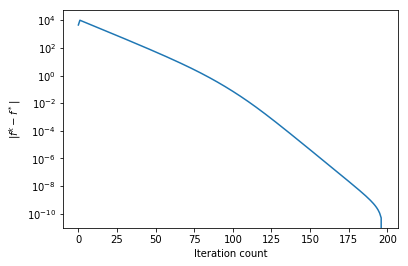

In [174]:
error_plot(f,hist,xstar)

In [175]:
f(np.array(x0),0.2)

2202.512595305888

In [176]:
(A@xstar-b<0).all()

True

## Inverse barrier
---

## Largest Enclosed Rectangle
---